#Question 1


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

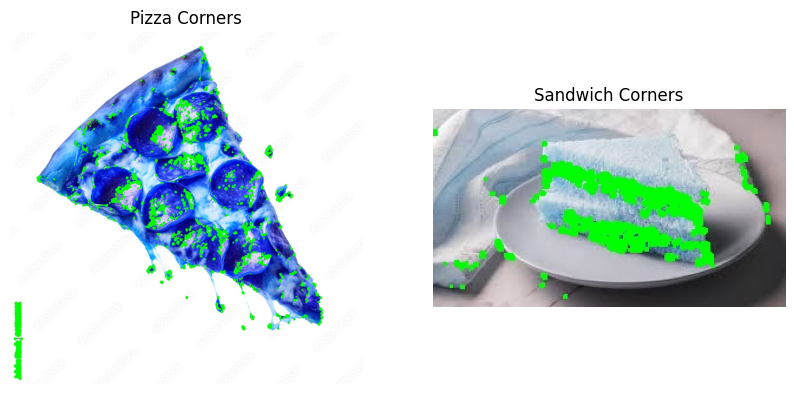

In [5]:


p = '/content/drive/MyDrive/CSE463/CSE463_03_24341284_Sowad_Rahman/Dataset/pizza.jpg'
s = '/content/drive/MyDrive/CSE463/CSE463_03_24341284_Sowad_Rahman/Dataset/sandwich.jpg'
o = '/content/drive/MyDrive/CSE463/CSE463_03_24341284_Sowad_Rahman/outputs'
os.makedirs(o, exist_ok=True)

for i, f in zip(['p', 's'], [p, s]):
    img = cv2.imread(f)
    if img is None:
        print(f"Error: Unable to read image {f}")
        continue
    g = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    g = np.float32(g)
    h = cv2.cornerHarris(g, 4, 7, 0.02)
    h = cv2.dilate(h, None)
    t = 0.01 * h.max()
    img[h > t] = [0, 255, 0]
    cv2.imwrite(os.path.join(o, f'{i}_corners.jpg'), cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

pi = cv2.imread(os.path.join(o, 'p_corners.jpg'))
si = cv2.imread(os.path.join(o, 's_corners.jpg'))

if pi is None or si is None:
    print("Error: One or both processed images could not be loaded.")
else:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(pi, cv2.COLOR_BGR2RGB))
    plt.title('Pizza Corners')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(si, cv2.COLOR_BGR2RGB))
    plt.title('Sandwich Corners')
    plt.axis('off')
    plt.show()


#Explanation
# Here we can see The pizza has Circular shape and irregular toppings like pepperoni is not detecting the edges or corners properly
#But due to the sharp well-defined edges of sandwich slice it can do it better
#The triangular sandwich slice makes Harris "happier"

#Question 2

##PART 01

**Orignal image**

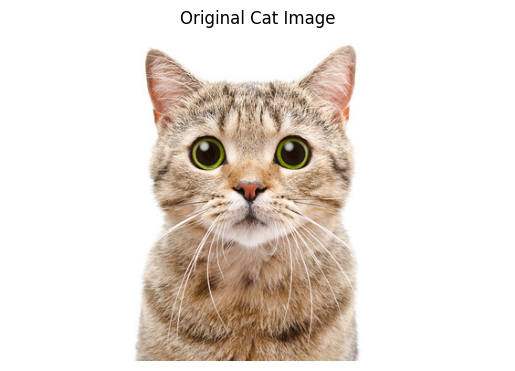

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def save_image(image, output_path):
    cv2.imwrite(output_path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
input_image_path = '/content/drive/MyDrive/CSE463/CSE463_03_24341284_Sowad_Rahman/Dataset/cat.jpg'
output_folder = '/content/drive/MyDrive/CSE463/CSE463_03_24341284_Sowad_Rahman/outputs'
os.makedirs(output_folder, exist_ok=True)
img = cv2.imread(input_image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Original Cat Image')
plt.axis('off')
plt.show()
save_image(img, os.path.join(output_folder, 'original_cat.jpg'))





**Shrunked**

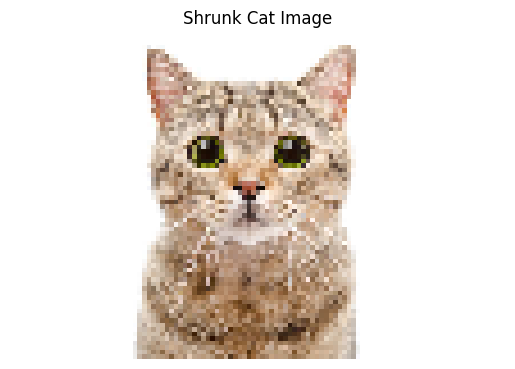

In [18]:
transform_img = cv2.resize(img, None, fx=0.2, fy=0.2)
plt.imshow(transform_img)
plt.title('Shrunk Cat Image')
plt.axis('off')
plt.show()
save_image(transform_img, os.path.join(output_folder, 'shrunk_cat.jpg'))

**Translated**

(360, 543, 3)


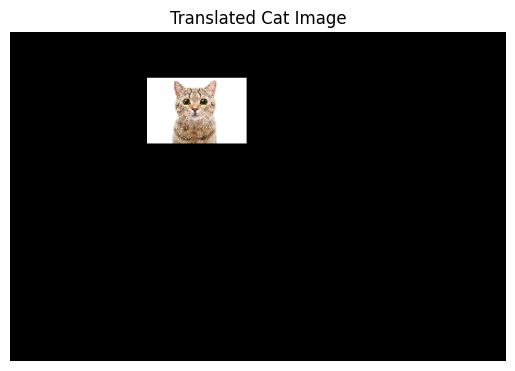

In [19]:
r, c, _ = img.shape
print(img.shape)
trans_mat = np.float32([[1, 0, 150], [0, 1, 50]])
transform_img = cv2.warpAffine(transform_img, trans_mat, (c, r))
plt.imshow(transform_img)
plt.title('Translated Cat Image')
plt.axis('off')
plt.show()
save_image(transform_img, os.path.join(output_folder, 'translated_cat.jpg'))

**Rotated**

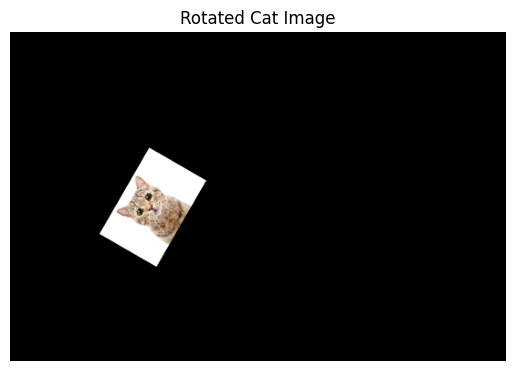

In [20]:
rot_mat = cv2.getRotationMatrix2D((c / 2, r / 2), 60, 1)
transform_img = cv2.warpAffine(transform_img, rot_mat, (c, r))
plt.imshow(transform_img)
plt.title('Rotated Cat Image')
plt.axis('off')
plt.show()
save_image(transform_img, os.path.join(output_folder, 'rotated_cat.jpg'))

**Brighten**

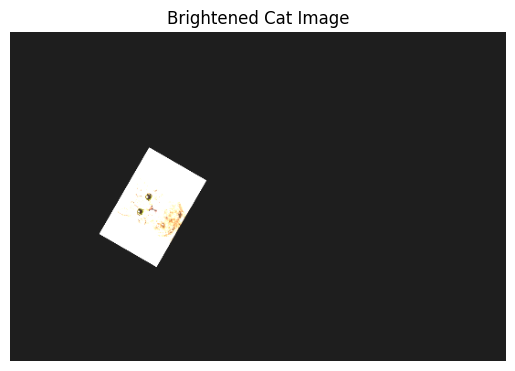

In [21]:
transform_img = cv2.convertScaleAbs(transform_img, alpha=1.8, beta=30)
plt.imshow(transform_img)
plt.title('Brightened Cat Image')
plt.axis('off')
plt.show()
save_image(transform_img, os.path.join(output_folder, 'brightened_cat.jpg'))

##PART 02


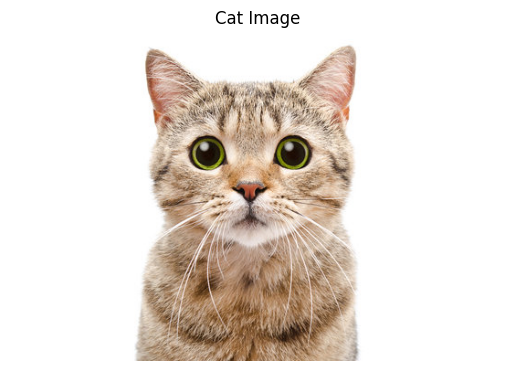

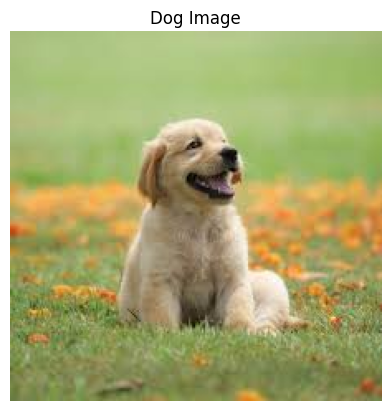

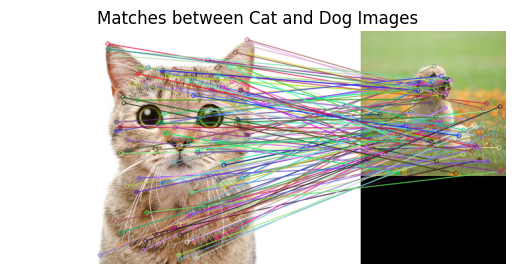

In [22]:
def save_image(image, output_path):
    cv2.imwrite(output_path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
cat_image_path = '/content/drive/MyDrive/CSE463/CSE463_03_24341284_Sowad_Rahman/Dataset/cat.jpg'
dog_image_path = '/content/drive/MyDrive/CSE463/CSE463_03_24341284_Sowad_Rahman/Dataset/dog.jpg'
output_folder = '/content/drive/MyDrive/CSE463/CSE463_03_24341284_Sowad_Rahman/outputs'
img = cv2.imread(cat_image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Cat Image')
plt.axis('off')
plt.show()
img_d = cv2.imread(dog_image_path)
img_d = cv2.cvtColor(img_d, cv2.COLOR_BGR2RGB)
plt.imshow(img_d)
plt.title('Dog Image')
plt.axis('off')
plt.show()
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img, None)
kp2, des2 = sift.detectAndCompute(img_d, None)
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)
img_result = cv2.drawMatches(img, kp1, img_d, kp2, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img_result)
plt.title('Matches between Cat and Dog Images')
plt.axis('off')
plt.show()
save_image(img_result, os.path.join(output_folder, 'matches_cat_dog.jpg'))
#Explanation
#SIFT can detect similar local features between different images  but it cannot differentiate between totally different objects like a cat and a dog.


****

#Question 3

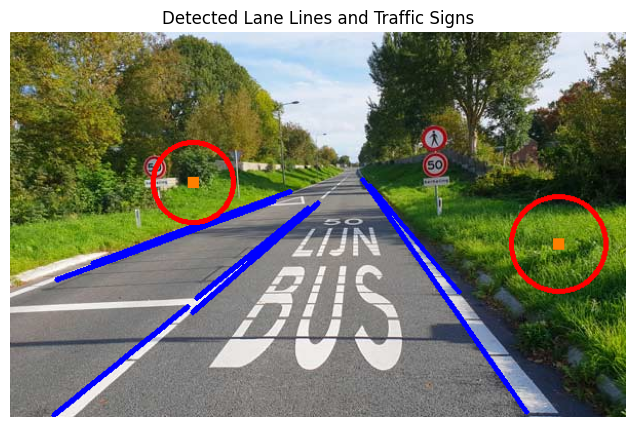

In [92]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('/content/drive/MyDrive/CSE463/CSE463_03_24341284_Sowad_Rahman/Dataset/busbaan.jpg')


gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


blurred = cv2.GaussianBlur(gray, (5, 5), 0)


edges = cv2.Canny(blurred, 50, 150)


rho = 1
theta = np.pi / 180
threshold = 150
min_line_length = 100
max_line_gap = 2

lines = cv2.HoughLinesP(edges, rho, theta, threshold, minLineLength=min_line_length, maxLineGap=max_line_gap)


lane_line_img = np.copy(image)


if lines is not None:
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(lane_line_img, (x1, y1), (x2, y2), (255, 0, 0), 3)


circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1, minDist=10, param1=20, param2=78, minRadius=5, maxRadius=70)


if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        cv2.circle(lane_line_img, (x, y), r, (0, 0, 255), 4)
        cv2.rectangle(lane_line_img, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)


plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(lane_line_img, cv2.COLOR_BGR2RGB))
plt.title('Detected Lane Lines and Traffic Signs')
plt.axis('off')
plt.show()
#couln't fine tune it more

